## DATA IMBALANCING

 The classical data imbalance problem is recognized as one of the major problems in the field of data mining and machine learning as most machine learning algorithms assume that data is equally distributed. In the case of imbalanced data, majority classes dominate over minority classes, causing the machine learning classifiers to be more biased towards majority classes.

 Some of the real-world examples involve oil-spill detection, network intrusion detection, fraud detection, and rare diseases example of fraud detection, the goal is to identify whether the transaction is fraudulent or not. Because most transactions are not fraudulent, this causes the model to predict the fraudulent transactions as valid. 
To overcome these challenges, several approaches have been developed that can be implemented during the pre-processing stage. One commonly used strategy is called  resampling, which includes undersampling and oversampling techniques

###  METHODS TO HANDLE DATA IMBALANCEMENT

###  Change the algorithm

While in every machine learning problem, it’s a good rule of thumb to try a variety of algorithms, it can be especially beneficial with imbalanced datasets. Decision trees frequently perform well on imbalanced data. They work by learning a hierarchy of if/else questions and this can force both classes to be addressed.

### Resampling technique
1.Oversampling:In oversampling we create additional data for the minority class either by making duplicates from the minority class or by some method to make additional synthetic data that is representative of the minority class.
    
2.Undersampling:In undersampling we remove data for the majority class either randomly or by some method to choose the most ‘appropriate’ points to remove.
    
3.Random undersampling:In undersampling we simply choose random data points from within the majority class and delete them until both classes are the same size.
    
4.Random oversampling:The easiest, and most naive option is random oversampling where we randomly duplicate data points within the minority class until both classes are the same size. Here we need to use replace=True in order to sample with replacement, which allows the method to duplicate data.

 

### Change the performance metric

As we know, accuracy is not the best metric to use when evaluating imbalanced datasets as it can be very misleading. Metrics that can provide better insight include:

Confusion Matrix: a table showing correct predictions and types of incorrect predictions.
        
Precision: the number of true positives divided by all positive predictions. Precision is also called Positive Predictive Value. It is a measure of a classifier’s exactness. Low precision indicates a high number of false positives.
 Recall: the number of true positives divided by the number of positive values in the test data. Recall is also called Sensitivity or the True Positive Rate. It is a measure of a classifier’s completeness. Low recall indicates a high number of false negatives.
        
F1: Score: the weighted average of precision and recall.

### Generate synthetic samples

A technique similar to upsampling is to create synthetic samples. Here we will use imblearn’s SMOTE or Synthetic Minority Oversampling Technique. SMOTE uses a nearest neighbors algorithm to generate new and synthetic data we can use for training our model.

### HANDLING DATA IMBALANCE BY USING RESAMPLING TECHNIQUE

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [30]:
# Load the train set 
data= pd.read_csv('data/train_data_week_1_challenge.csv')
data.head()

,continue_drop,student_id,gender,caste,mathematics_marks,english_marks,science_marks,science_teacher,languages_teacher,guardian,internet,school_id,total_students,total_toilets,establishment_year
0,continue,s01746,M,BC,0.666,0.468,0.666,7,6,other,True,305,354,86.0,1986.0
1,continue,s16986,M,BC,0.172,0.420,0.172,8,10,mother,False,331,516,15.0,1996.0
2,continue,s00147,F,BC,0.212,0.601,0.212,1,4,mother,False,311,209,14.0,1976.0
3,continue,s08104,F,ST,0.434,0.611,0.434,2,5,father,True,364,147,28.0,1911.0
4,continue,s11132,F,SC,0.283,0.478,0.283,1,10,mother,True,394,122,15.0,1889.0


In [31]:
# converting string into non-string values 
change_values = {"continue_drop":{"continue":1,"drop":0},
                "gender":{"F":0,"M":1},
                "caste":{"BC":0,"SC":1,"OC":2,"ST":3},
                "guardian":{"mother":0,"father":1,"other":2,"mixed":3}
               }

data.replace(change_values, inplace=True)

data.internet = data.internet.astype(int)
data.head()

,continue_drop,student_id,gender,caste,mathematics_marks,english_marks,science_marks,science_teacher,languages_teacher,guardian,internet,school_id,total_students,total_toilets,establishment_year
0,1,s01746,1,0,0.666,0.468,0.666,7,6,2,1,305,354,86.0,1986.0
1,1,s16986,1,0,0.172,0.420,0.172,8,10,0,0,331,516,15.0,1996.0
2,1,s00147,0,0,0.212,0.601,0.212,1,4,0,0,311,209,14.0,1976.0
3,1,s08104,0,3,0.434,0.611,0.434,2,5,1,1,364,147,28.0,1911.0
4,1,s11132,0,1,0.283,0.478,0.283,1,10,0,1,394,122,15.0,1889.0


In [32]:
target =data['continue_drop'].copy()

In [33]:
target.value_counts()

1    16384
0      806
Name: continue_drop, dtype: int64

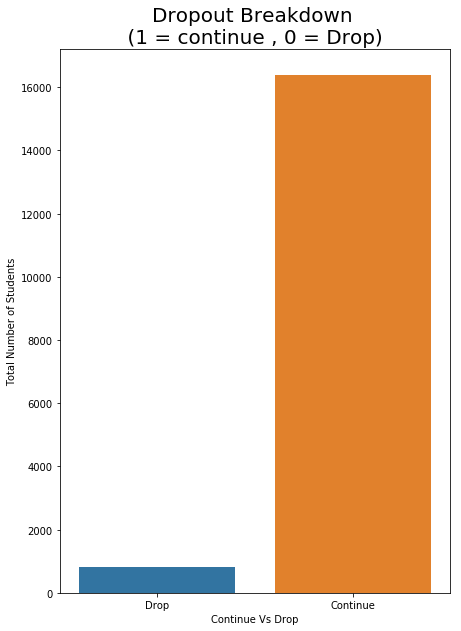

In [34]:
# Visualize the target column before data handling

import seaborn as sns
plt.figure(figsize=(7,10))
sns.countplot(data['continue_drop'])
plt.title("Dropout Breakdown \n (1 = continue , 0 = Drop) ", fontsize = 20)
plt.xlabel("Continue Vs Drop", fontsize = 10);
plt.ylabel("Total Number of Students", fontsize = 10);
labels = ['Continue','Drop']
val = [1,0] 
plt.xticks(val, labels);

In [35]:
majority = data[data['continue_drop']==1]
minority = data[data['continue_drop']==0]

In [36]:
# check the shape for majority
majority.shape

(16384, 15)

In [37]:
# check the shape for minority class
minority.shape

(806, 15)

In [38]:
# get class counts 
count_1,count_0 = data['continue_drop'].value_counts()

In [39]:
# upsampling majority class
upsampled = minority.sample(count_1,replace=True)
upsampled.sample(4)

,continue_drop,student_id,gender,caste,mathematics_marks,english_marks,science_marks,science_teacher,languages_teacher,guardian,internet,school_id,total_students,total_toilets,establishment_year
12798,0,s02315,0,3,0.681,0.758,0.681,5,3,0,1,330,125,43.0,1959.0
15321,0,s04633,0,0,0.157,0.674,0.157,1,8,0,1,312,257,14.0,1946.0
10442,0,s04989,0,3,0.681,0.758,0.681,5,3,0,1,304,390,28.0,1914.0
14126,0,s17397,1,0,0.438,0.495,0.438,5,3,0,1,323,344,28.0,1961.0


In [40]:
data_balanced1 = pd.concat([upsampled,majority], axis = 0)

In [41]:
#down sapmle 
downsampled = majority.sample(count_1,random_state=100)

In [42]:
data_balanced = pd.concat([upsampled,downsampled], axis = 0)

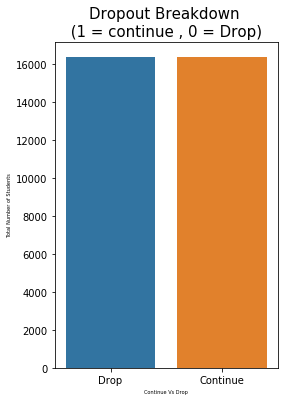

In [22]:
# Visualize the target column again 

import seaborn as sns
plt.figure(figsize=(4,6))
sns.countplot(data_balanced['continue_drop'])
plt.title("Dropout Breakdown \n (1 = continue , 0 = Drop) ", fontsize = 15)
plt.xlabel("Continue Vs Drop", fontsize = 5);
plt.ylabel("Total Number of Students", fontsize = 5);
labels = ['Continue','Drop']
val = [1,0] 
plt.xticks(val, labels);